## Linear Regression on Boston Housing Dataset

There are 506 samples and 13 feature variables in this Boston Housing Dataset. 
The objective is to predict the value of prices of the house using the given features, I will be using Linear regression Model to predict the value of the target variable.

Data dictionary of the dataset is below:

#### Importing Libraries

In [1]:
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

#### Reading the file

In [2]:
df = pd.read_csv('/Users/jashan/Desktop/Boston.csv')

#### Exploratory Data Analysis

In [3]:
df.head(6)  
#this will display the first 6 elements of the dataset 

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [4]:
df.shape   
#the matrix(rows*columns)

(506, 15)

In [5]:
df_new = df.drop('Unnamed: 0',axis=1) 
#Dropping the first column of the dataset (unnamed:0) since python has the inbuilt counter for the same and saving 
#the new dataset in the new dataframe

In [6]:
df_new.shape
#the matrix(rows*columns)

(506, 14)

In [7]:
cols= df_new.columns
cols
#features of the dataset

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [8]:
df_new.head(6)
#this will display the first 6 elements of the dataset 

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [9]:
target = df_new.drop(df_new.loc[:, 'crim':'lstat'].columns, axis = 1)
#Keeping the last column of the dataset (medv). This is the target feature/dependent variable.

In [10]:
target.shape

(506, 1)

In [11]:
df_new.isna().sum()
# check for missing values in all the columns

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [12]:
df_new.info()
#information on the type of features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [13]:
df_new.describe(include='all')
#Computes a summary of statistics pertaining to the DataFrame columns.

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Here we can see that all the statistical measures are displayed for each and every column.
At aglance , i can see (looking at the 25th,50th and 75th percentile values of all the columns and below are the observations:

crim	- Highly right skewed   
zn.     - Highly right skewed  
indus   - Right skewed	  
chas    - normal	  
nox     - normal	   
rm      - lightly left skewed	  
age     - left skewed  
dis	    - normal   
rad	    - highly right skewed  
tax	    - highly right skewed  
ptratio	- normal  
black	- normal
lstat	- normal  
medv    - normal


Now i will construct the histogram and boxplots for each of the feature to check their distrrbution and skewness and 

#### Data Visualization

In this section, we will use some visualizations to understand the relationship of the target variable with other features.

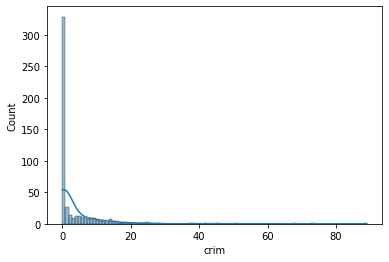

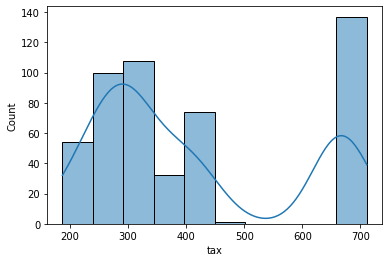

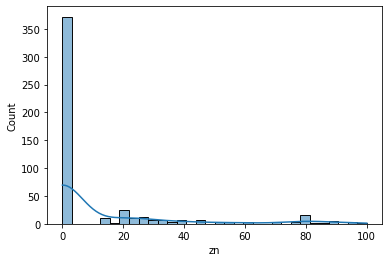

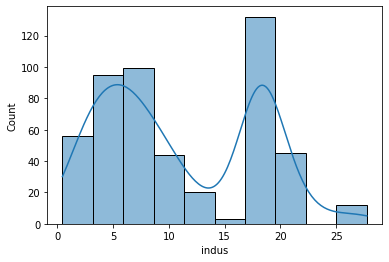

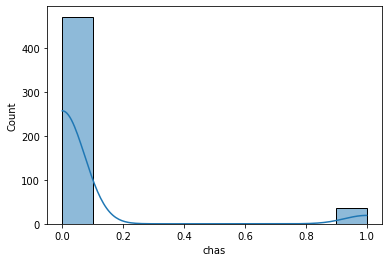

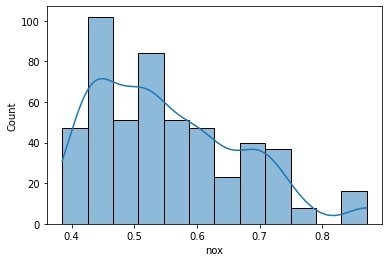

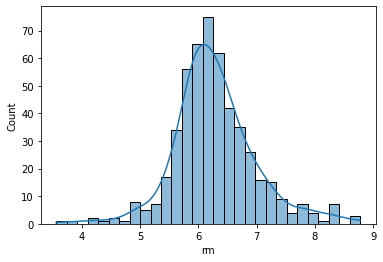

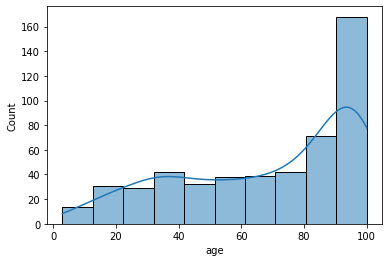

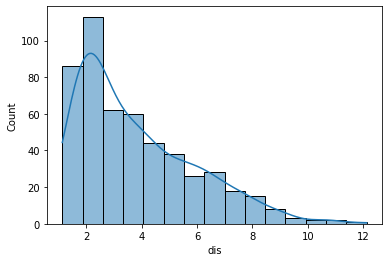

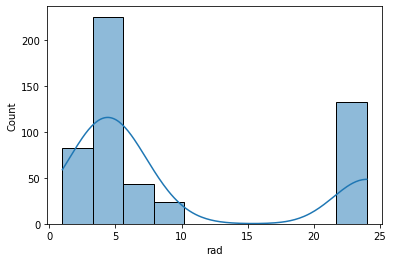

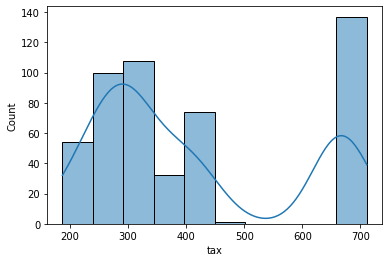

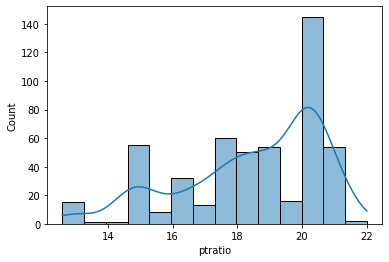

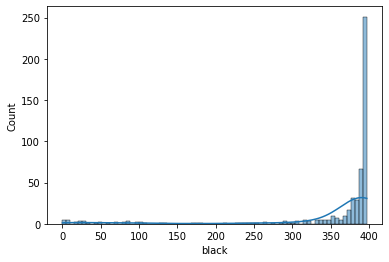

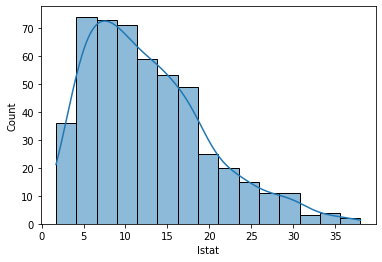

In [14]:
#plotting the histograms of all the features
x=["crim","tax","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","black","lstat"]

for i in x:
    sns.histplot(df_new[i],kde=True)
    plt.show()

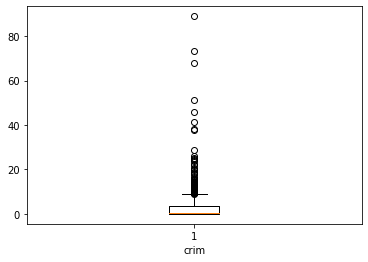

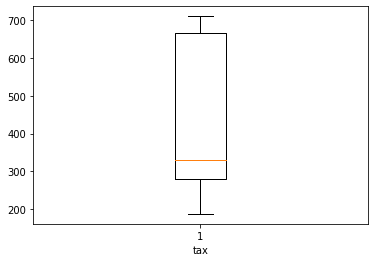

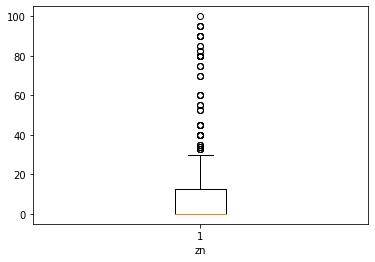

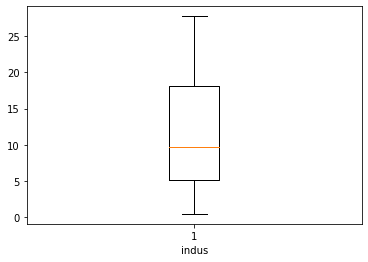

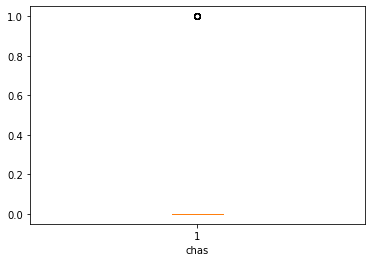

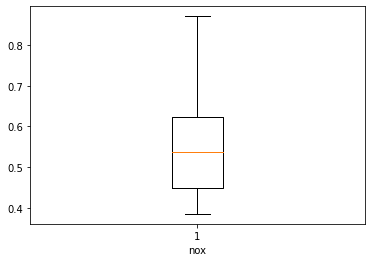

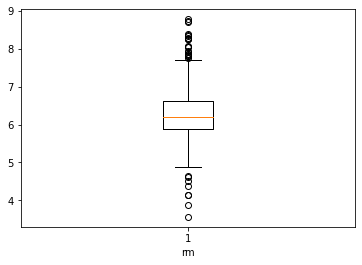

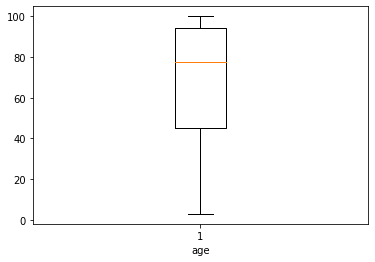

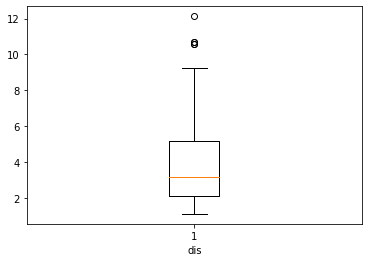

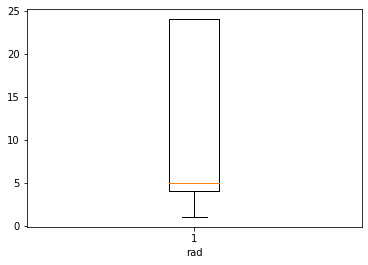

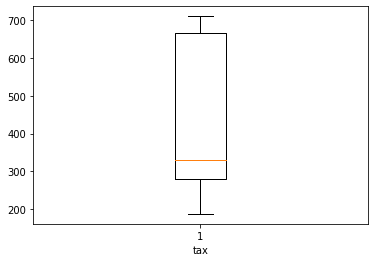

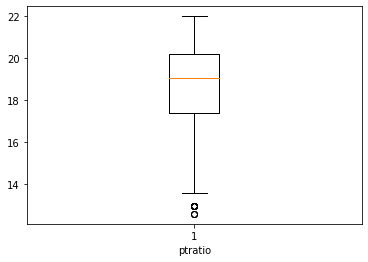

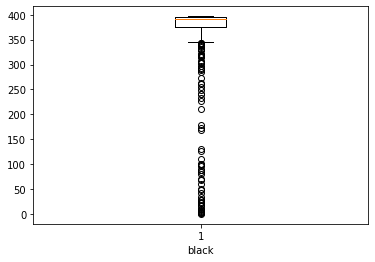

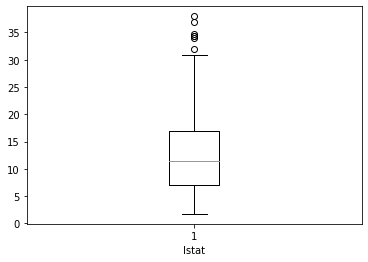

In [15]:
#box plots
x=["crim","tax","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","black","lstat"]

for i in x:
    figure = plt.figure
    ax = plt.gca()
    ax.boxplot(df_new[i])
    ax.set_xlabel(i)
    plt.show()

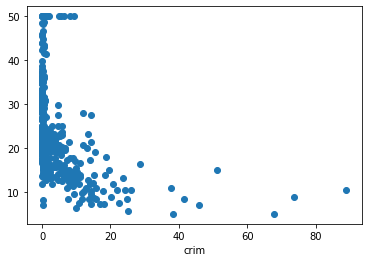

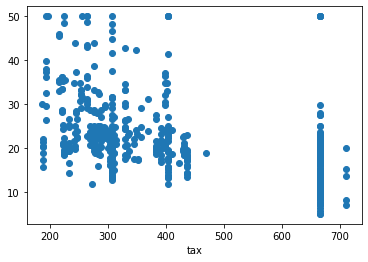

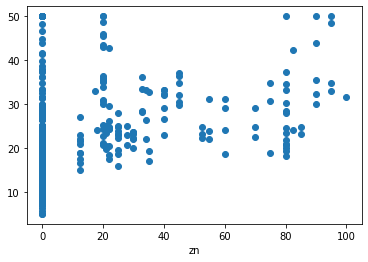

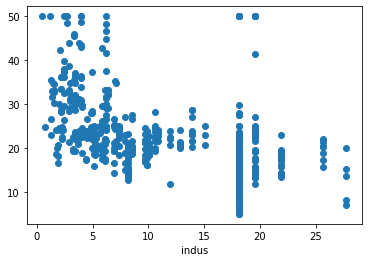

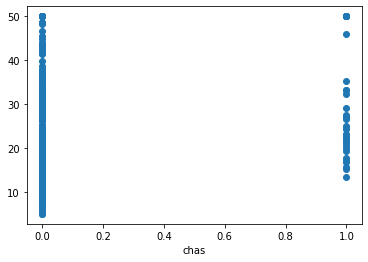

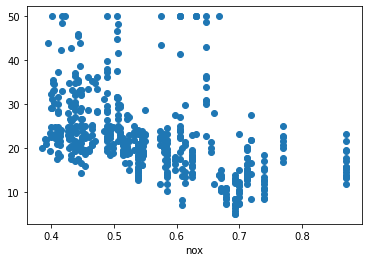

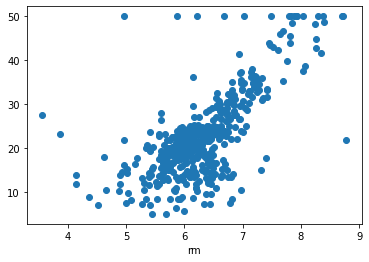

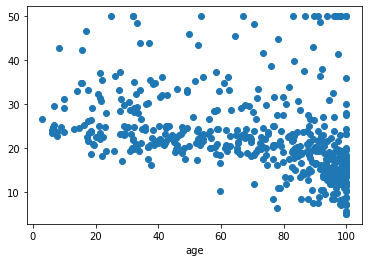

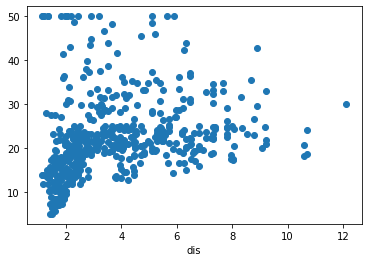

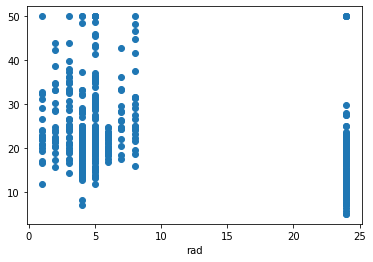

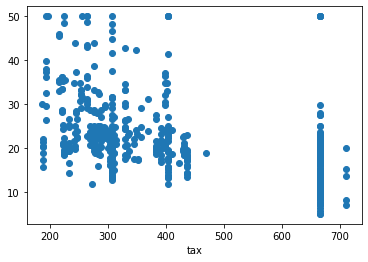

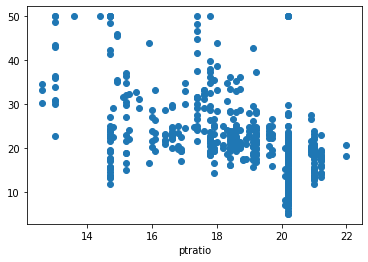

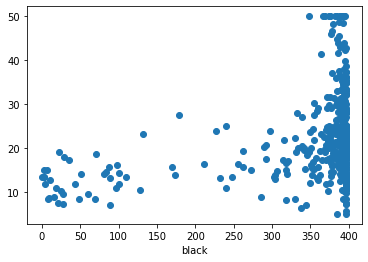

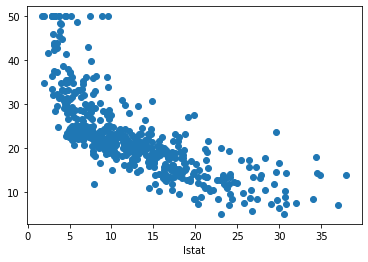

In [16]:
#plotting the scatter plots of all the features w.r.t the dependent variable i.e. medv and look if they have any correlation or not?
x=["crim","tax","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","black","lstat"]

for i in x:
    figure = plt.figure
    ax = plt.gca()
    ax.scatter(df_new[i], df_new["medv"])
    ax.set_xlabel(i)
    plt.show()

In [17]:
#Checking the correlation of all the features
df_new.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


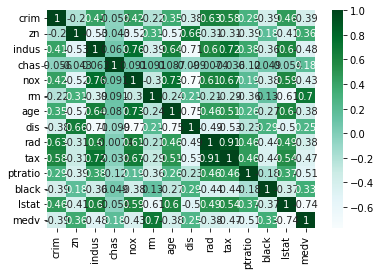

In [18]:
#heatmap of the correlation
#a correlation matrix that measures the linear relationships between the variables
dataplot = sns.heatmap(df_new.corr(), cmap="BuGn", annot=True)
plt.show()

The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

Observations:

From the above coorelation plot we can see that MEDV(dependent variable) is strongly correlated to LSTAT, RM(independent variables)


#### Linear Regression

In [19]:
#again plotting the corresponding scatter plots between 2 independednt and target variable 
# lstat
# rm
# target variable - medv

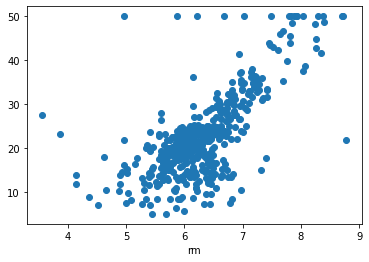

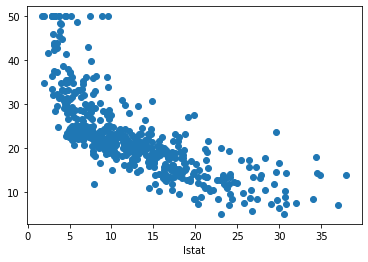

In [20]:
x=["rm","lstat"]

for i in x:
    figure = plt.figure
    ax = plt.gca()
    ax.scatter(df_new[i], df_new["medv"])
    ax.set_xlabel(i)
    plt.show()

Observations:

1. The prices increase as the value of RM increases linearly. There are few outliers and the data seems to be capped at 50.

2. The prices tend to decrease with an increase in LSTAT. Though it doesn’t look to be following exactly a linear line.

In [21]:
#Preparing the data for training the model
x=df_new[["rm","lstat"]]
y=df_new["medv"]


In [22]:
#Splitting the training and test dataset (80 percent training and 20 percent test data)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [23]:
#Printing x_train
x_train

,rm,lstat
147,4.926,29.53
183,6.563,5.68
385,5.277,30.81
472,6.437,14.36
426,5.837,15.69
...,...,...
300,6.871,6.07
243,6.393,5.19
51,6.115,9.43
393,6.193,15.17


In [24]:
#Printing y_train
y_train

147    14.6
183    32.5
385     7.2
472    23.2
426    10.2
       ... 
300    24.8
243    23.7
51     20.5
393    13.8
458    14.9
Name: medv, Length: 404, dtype: float64

#### Model Building

In [25]:
lin_model = LinearRegression()
lin_model.fit(x_train, y_train)

LinearRegression()

In [26]:
#Model Evaluation on train dataset
y_train_predict = lin_model.predict(x_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)
print("The value of rmse on training dataset is " + str(rmse))
print("The value of r-sqaure on training dataset is " + str(r2))

The value of rmse on training dataset is 5.423839495622367
The value of r-sqaure on training dataset is 0.6548953318446011


In [27]:
#Model Evaluation on test dataset
y_test_predict = lin_model.predict(x_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)
print("The value of rmse on test dataset is " + str(rmse))
print("The value of r-sqaure on test dataset is " + str(r2))

The value of rmse on test dataset is 5.916897042471312
The value of r-sqaure on test dataset is 0.5683621187357393


Conclusion:

    r2 value (range is (0,1)) is around 0.65

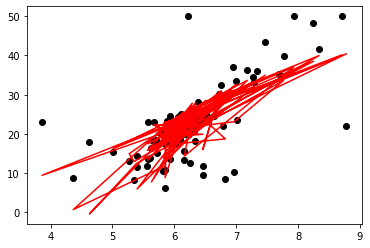

In [28]:
# Plot outputs w.r.t rm feature
figure = plt.figure
ax = plt.gca()
plt.scatter(x_test["rm"], y_test, color='black')
plt.plot(x_test["rm"], y_test_predict, color='red')



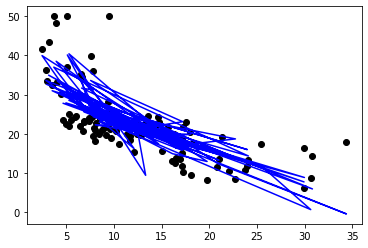

In [29]:
# # Plot outputs w.r.t lstat feature
figure = plt.figure
ax = plt.gca()
plt.scatter(x_test["lstat"], y_test, color='black')
plt.plot(x_test["lstat"], y_test_predict, color='blue')

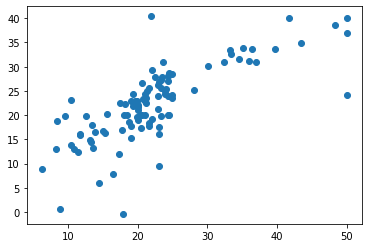

In [30]:
# plotting the y_test vs y_pred
# ideally should have been a straight line
plt.scatter(y_test, y_test_predict)
plt.show()